# Fitness weight distributions for different selection factors

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ThesisScripts.MyModel import Population, Clone

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")


#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
selection_values = [0, 0.004, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1.5, 3]
l = l = 10**8
q = 10**(-3)
qfac = 1
alpha = 0.3

In [3]:
np.random.seed(123)

populations = []
for s in tqdm(selection_values):
    pop = Population(l, q, qfac, alpha, selection=s)
    pop.simulate()
    populations.append(pop)

100%|██████████| 10/10 [01:37<00:00,  9.75s/it]


In [4]:
colors = sns.color_palette()
labels = ["Selection = %s" %(i) for i in selection_values]

In [5]:
import itertools

# function to flip order of handles and labels of figure legend to display them correctly
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

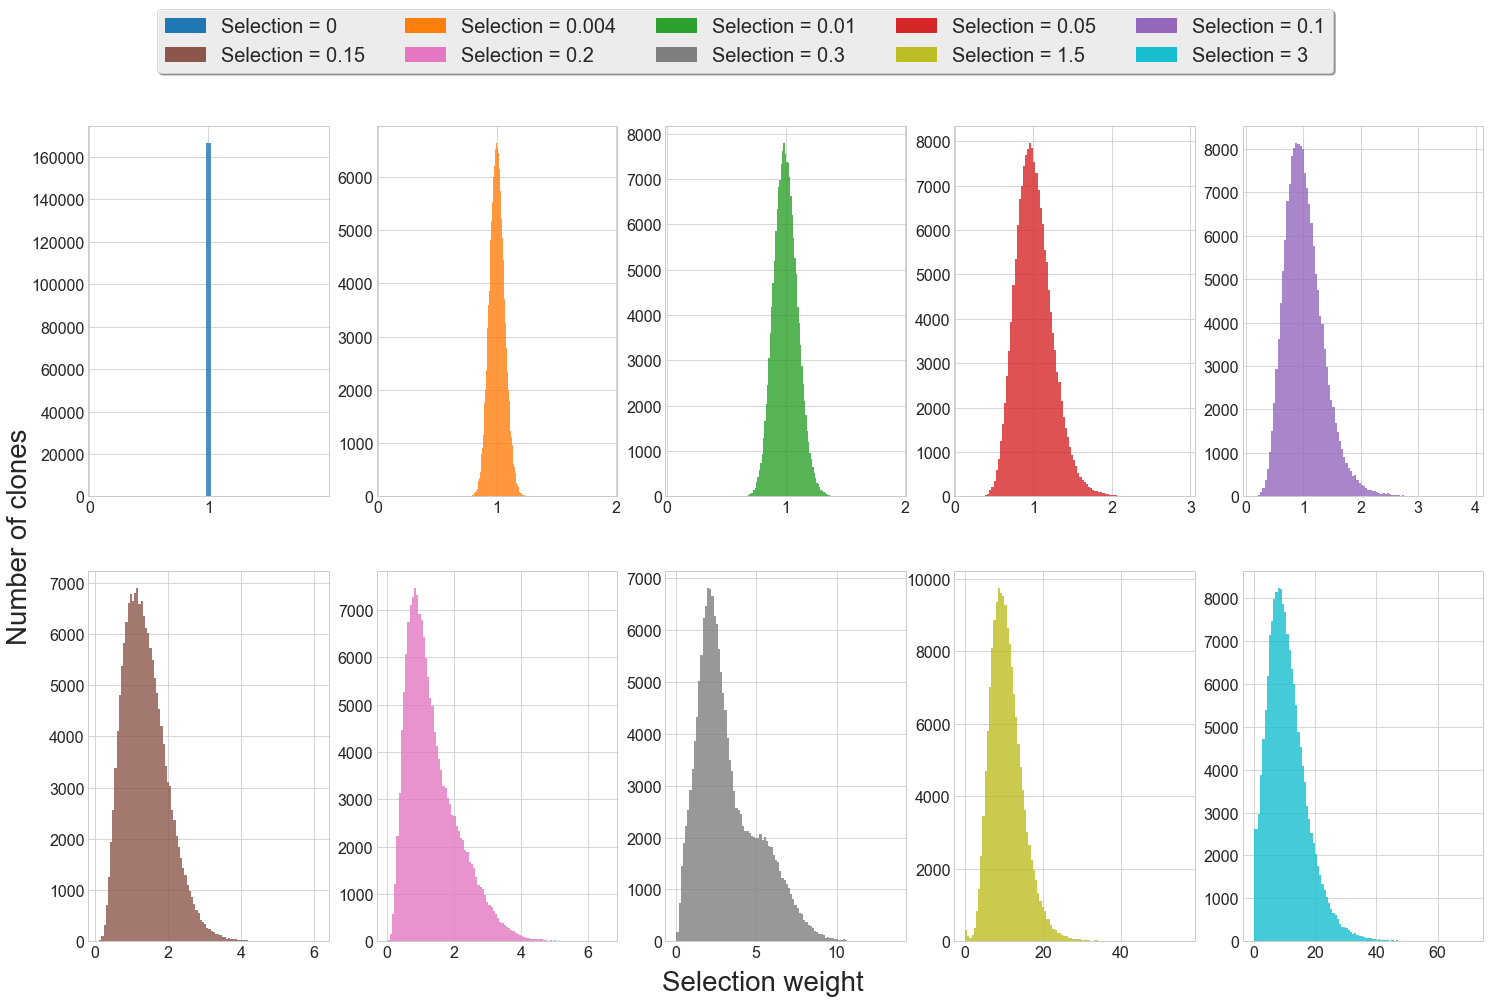

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(25, 15), squeeze=False)

handles = [] # legend handles

for pop, ax, col, lab in zip(populations, np.ndenumerate(axes), colors, labels):
    weights = []
    for clone in pop.clones:
        weights.append(clone.weight)
    
    if ax[1] == axes[0, 0]:
        ax[1].hist(weights, bins=25, color=col, alpha=0.8);
    else:
        ax[1].hist(weights, bins=100, color=col, alpha=0.8);
    patch = mpatches.Patch(color=col, label=lab)
    handles.append(patch)

axes[0, 0].set_xlim(-0.01, 2.01);
axes[0, 0].set_xticks([0, 1]);
axes[0, 1].set_xlim(-0.01, 2.01);
axes[0, 1].set_xticks([0, 1, 2]);
axes[0, 2].set_xlim(-0.01, 2.01);
axes[0, 2].set_xticks([0, 1, 2]);
axes[0, 3].set_xlim(-0.01, None);
fig.text(0.5, 0.08, "Selection weight", ha='center', fontsize='xx-large');
fig.text(0.08, 0.5, "Number of clones", va='center', rotation='vertical', fontsize='xx-large');
fig.legend(flip(handles, 5), flip(labels, 5), loc='upper center', ncol=5, prop={'size': 20},
           frameon=True, fancybox=True, shadow=True);
plt.savefig('./Figures/Selection_WEIGHTS_analysis.png', bbox_inches='tight')
plt.show()